#### Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import time

# starting time
begin = time.time()

#### Data Preprocessing

In [ ]:
fldr="/content/drive/MyDrive/Colab Notebooks/Face_data_based_deeplearning/UTKFace"

In [ ]:
import os
files=os.listdir(fldr)


In [ ]:
### DATASET 1 (UTKFace)

#prolazimo kroz svaku sliku i iz naziva uzimamo podatke o godinama i spolu(prvo broj u nazivu označava godine, a drugi spol)
#0- muško, 1-žensko
import cv2
ages=[]
genders=[]
images=[]

for fle in files:
  #iz slike uzimamo podatke i spremamo u polje
  #try-except zbog datoteka u mapi koji nisu slike
  try:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

    #učitavanje slike iz putanje kao polje piksela, promjena formata boje i rezising te spremanje u polje
    total=fldr+'/'+fle
    #print(total)
    image=cv2.imread(total)

    #iz dokumentacije: When the image file is read with the OpenCV function imread(), the order of colors is BGR
      #Therefore, if you want to use both the Pillow function and the OpenCV function, you need to convert BGR and RGB.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image= cv2.resize(image,(48,48))
    images.append(image)

  except: pass

  

print("finished")


finished


In [ ]:
### DATASET 2 (ALL-AGE-FACES)
## 13322 slika, uzeti svaku 3. sliku pa ih bude jedno 4440 u novom datasetu koji ćemo obrađivati


fldr2="/content/drive/MyDrive/Colab Notebooks/Face_data_based_deeplearning/ALL-AGE-FACES"
files2=os.listdir(fldr2)

'''
Each image contains a different individual, and is given a unique name (%05dA%02d.jpg), illustrating the individual’s serial number and specific age. 
Individuals from serial number 00000 to 07380 are all female, from 07381 to 13321 are male.  --- a = "00000A02"
'''
cnt = 0
for count, fle in enumerate(files2):
  try:
    #iz slike uzimamo podatke i spremamo u polje
    age=int(fle[-6:-4])
    if count>7380 : gender= 1
    else: gender= 0
    
    ages.append(age)
    genders.append(gender)

    #učitavanje slike iz putanje kao polje piksela, promjena formata boje i rezising te spremanje u polje
    total=fldr2+'/'+fle
    #print(total)
    image=cv2.imread(total)

    #iz dokumentacije: When the image file is read with the OpenCV function imread(), the order of colors is BGR
      #Therefore, if you want to use both the Pillow function and the OpenCV function, you need to convert BGR and RGB.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image= cv2.resize(image,(48,48))
    images.append(image)
  
  except: cnt= cnt+1

print("finished")
print(cnt)

finished
20


In [ ]:
# start timer after images are uploaded and ready
start = time.time()

In [ ]:
''' visak 
for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  ages.append(age)
  genders.append(gender)
'''

" visak \nfor fle in files:\n  age=int(fle.split('_')[0])\n  gender=int(fle.split('_')[1])\n  ages.append(age)\n  genders.append(gender)\n"

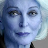

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(images[24])

In [ ]:
print(ages[24])
print(genders[24])

80
1


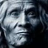

In [ ]:
cv2_imshow(images[53])

In [ ]:
print(ages[53])
print(genders[53])

80
1


In [ ]:
import numpy as np
images_f=np.array(images)
genders_f=np.array(genders)
ages_f=np.array(ages)

In [ ]:
np.save(fldr+'image2.npy',images_f)
np.save(fldr+'gender2.npy',genders_f)
np.save(fldr+'age2.npy',ages_f)

In [ ]:
#loadanje ako smo već jednom obradili
import numpy as np
genders_f = np.load('/content/drive/MyDrive/Colab Notebooks/Face_data_based_deeplearning/UTKFacegender2.npy')
images_f = np.load('/content/drive/MyDrive/Colab Notebooks/Face_data_based_deeplearning/UTKFaceimage2.npy')
ages_f = np.load('/content/drive/MyDrive/Colab Notebooks/Face_data_based_deeplearning/UTKFaceage2.npy')

Male = 0
Female= 1

In [ ]:

values, counts = np.unique(genders_f, return_counts=True)
print(counts)

[27153 18961]


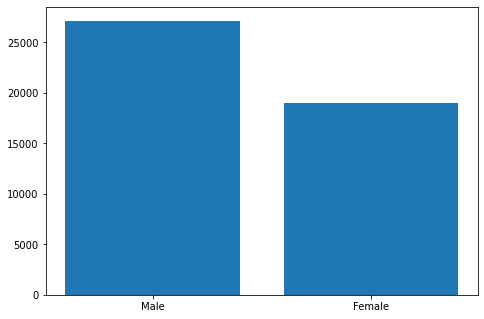

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values=[counts[0],counts[1]]
ax.bar(gender,values)
plt.show()

In [ ]:
#vidimo da ima npr 1123 osoba s 1 godinom i 4 osobe za 116 godina
values, counts = np.unique(ages_f, return_counts=True)
print(counts)

[1123  720  459  452  367  351  324  454  363  289  229  312  289  312
  334  405  334  478  306  518  558  698  755 1224 1129 2672 1261 1454
 1281 1208  881 1314  780  997 1564 1187  951  815  738 1020  674  776
  627  462  862  525  526  433  482  621  366  448  473  599  522  546
  337  411  296  513  359  249  279  170  365  215  248  216  204  241
  127  158  163  132  220  158  128  191  109  237   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [ ]:
#val=values.tolist()
cnt=counts.tolist()

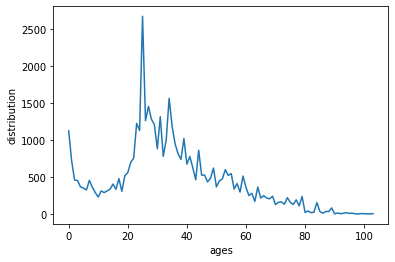

In [ ]:
#u bazi podataka najviše dvadesetogodišnjaka
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.show()

In [ ]:
#pripremanje kategorija za varijablu Y
labels=[]

i=0
while i<len(ages_f):
  label=[]
  label.append([ages_f[i]])
  label.append([genders_f[i]])
  labels.append(label)
  i+=1

In [ ]:
#normalizacija podataka
images_f_2=images_f/255

In [ ]:
labels_f=np.array(labels)

In [ ]:
images_f_2.shape

(46114, 48, 48, 3)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_f,test_size=0.3)

In [ ]:
#prvi element označava godine, drugi spol
Y_train[0:5]

array([[[41],
        [ 0]],

       [[45],
        [ 0]],

       [[34],
        [ 1]],

       [[29],
        [ 0]],

       [[ 2],
        [ 0]]])

In [ ]:
#pretvaranje iz oblika [[[godina], [spol]],...] u oblik [[godina],[godina],...][[spol], [spol],...]] dakle iz toga da u svaki array sadrži godinu i spol u oblik da jedan array sadrži godinu a drugi spol
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [ ]:
Y_train_2

[array([[0],
        [0],
        [1],
        ...,
        [1],
        [0],
        [0]]), array([[41],
        [45],
        [34],
        ...,
        [32],
        [61],
        [16]])]

In [ ]:
Y_train_2[1][0:5]

array([[41],
       [45],
       [34],
       [29],
       [ 2]])

### Model

In [ ]:
#import po drugi puta u slučaju da pokrećemo kod samo od np.load nadalje.
import time

# starting time
start = time.time()

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


#https://towardsdatascience.com/facial-data-based-deep-learning-emotion-age-and-gender-prediction-47f2cc1edda7
def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x
def model(input_shape):
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,128)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  conv_4 = Convolution(maxp_3,256)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  flatten= Flatten() (maxp_4)
  dense_1= Dense(64,activation='relu')(flatten)
  dense_2= Dense(64,activation='relu')(flatten)
  drop_1=Dropout(0.2)(dense_1)
  drop_2=Dropout(0.2)(dense_2)
  output_1= Dense(1,activation="sigmoid",name='gender_out')(drop_1)
  output_2= Dense(1,activation="relu",name='age_out')(drop_2)
  model = Model(inputs=[inputs], outputs=[output_1,output_2])
  model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",
	metrics=["accuracy"])
  
  return model


In [ ]:
Model=model((48,48,3))

In [ ]:
Model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 48, 48, 32)   896         input_2[0][0]                    
__________________________________________________________________________________________________
dropout_6 (Dropout)             (None, 48, 48, 32)   0           conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 48, 48, 32)   0           dropout_6[0][0]                  
____________________________________________________________________________________________

#### Training

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [ ]:
fle_s='Age_and_gender22.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [ ]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=100,callbacks=[callback_list])

Epoch 1/100
505/505 [==============================] - 17s 30ms/step - loss: 17.4231 - gender_out_loss: 0.7073 - age_out_loss: 16.5121 - gender_out_accuracy: 0.5709 - age_out_accuracy: 0.0247 - val_loss: 16.2833 - val_gender_out_loss: 0.6732 - val_age_out_loss: 15.4645 - val_gender_out_accuracy: 0.5931 - val_age_out_accuracy: 0.0233

Epoch 00001: val_loss improved from inf to 16.28329, saving model to Age_and_gender22.h5
Epoch 2/100
505/505 [==============================] - 14s 28ms/step - loss: 15.0385 - gender_out_loss: 0.6646 - age_out_loss: 14.2181 - gender_out_accuracy: 0.5922 - age_out_accuracy: 0.0245 - val_loss: 13.0295 - val_gender_out_loss: 0.6097 - val_age_out_loss: 12.1915 - val_gender_out_accuracy: 0.6606 - val_age_out_accuracy: 0.0233

Epoch 00002: val_loss improved from 16.28329 to 13.02952, saving model to Age_and_gender22.h5
Epoch 3/100
505/505 [==============================] - 14s 28ms/step - loss: 12.8622 - gender_out_loss: 0.6028 - age_out_loss: 12.0162 - gender_o

In [ ]:
#ne radi
Model.save('age_and_gender_2.h5')

In [ ]:
#drugi nacin za spremanje
saveModel='age_and_gender_22.h5'
checkpointer = ModelCheckpoint(saveModel, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [ ]:
end = time.time()
try:
  #u slučaju da nismo runnali program od početka nego od np.load()
  print(f"Runtime of the full program is {end - begin}")

except: pass

print(f"Runtime of the model training is {end - start}")

Runtime of the model training is 1437.7679226398468


### Evaluation

In [ ]:
Model.evaluate(X_test,Y_test_2)

433/433 [==============================] - 3s 7ms/step - loss: 7.7473 - gender_out_loss: 0.2873 - age_out_loss: 6.2490 - gender_out_accuracy: 0.8753 - age_out_accuracy: 0.0231


[7.74728536605835,
 0.2873482406139374,
 6.248960018157959,
 0.8753162026405334,
 0.02305746264755726]

In [ ]:
pred=Model.predict(X_test)

In [ ]:
pred[1]

array([[75.66132  ],
       [ 6.7102327],
       [18.352    ],
       ...,
       [43.689842 ],
       [28.948997 ],
       [23.418524 ]], dtype=float32)

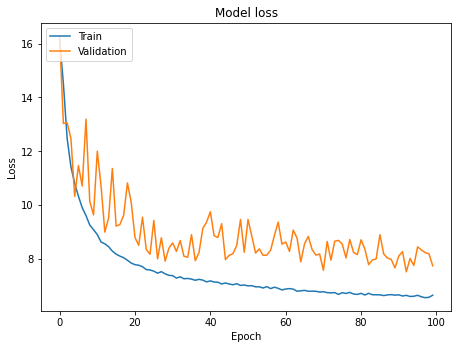

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

### For Gender

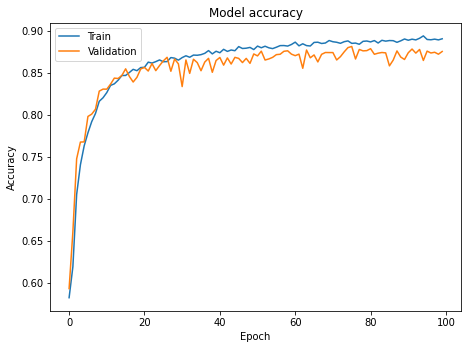

In [ ]:
plt.plot(History.history['gender_out_accuracy'])
plt.plot(History.history['val_gender_out_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

### For age

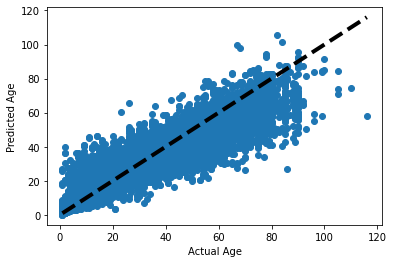

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

#### For Gender

In [ ]:
i=0
Pred_l=[]
while(i<len(pred[0])):

  Pred_l.append(int(np.round(pred[0][i])))
  i+=1


In [ ]:
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import classification_report 

In [ ]:

report=classification_report(Y_test_2[0], Pred_l)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      8205
           1       0.84      0.86      0.85      5630

    accuracy                           0.88     13835
   macro avg       0.87      0.87      0.87     13835
weighted avg       0.88      0.88      0.88     13835



In [ ]:

results = confusion_matrix(Y_test_2[0], Pred_l)

In [ ]:
def test_image(ind,images_f,images_f_2,Model):

  #pretvorba nazad u rgb format
  image = cv2.cvtColor(images_f[ind], cv2.COLOR_BGR2RGB)
  cv2_imshow(image)
  image_test=images_f_2[ind]

  #podaci iz slike i modela
  pred_1=Model.predict(np.array([image_test]))
  #print(pred_1)
  gender_f=['Male','Female']
  age=int(np.round(pred_1[1][0]))
  gender=int(np.round(pred_1[0][0]))
  print("Predicted Age: "+ str(age))
  print("Predicted Gender: "+ gender_f[gender])



In [ ]:
Y_train_2[1][24]

array([37])

In [ ]:
from google.colab.patches import cv2_imshow
test_image(57,images_f,images_f_2,Model)

NameError: ignored

In [ ]:
test_image(137,images_f,images_f_2,Model)

In [ ]:
test_image(502,images_f,images_f_2,Model)

In [ ]:
test_image(24,images_f,images_f_2,Model)